In [ ]:
import pandas as pd

In [14]:
df=pd.read_csv("household_power_consumption.txt",sep=";")

In [122]:
## Checking the size if the data
df.shape

(2075259, 9)

In [123]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [35]:
#Taking copy of the original data
df_copy=df.copy()

In [33]:
df_copy.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [34]:
# we have dropped null value from data and stored in df1
df1=df_copy.dropna(axis = 0)

In [36]:
#checking for null data
df1.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [37]:
# Taking sample of the 60000 sample from the df1 and storing it in data
data=df1.sample(60000)

In [124]:
#checking first 5 data
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Meter_Rating
910777,9/9/2008,05:01:00,0.582,0.160,237.660,2.800,0.0,0.0,6.0,6.0
1759837,21/4/2010,20:01:00,0.670,0.074,241.020,2.800,0.0,0.0,1.0,1.0
635015,1/3/2008,16:59:00,0.604,0.100,239.260,2.400,0.0,0.0,0.0,0.0
22784,1/1/2007,13:08:00,2.640,0.130,238.780,11.000,0.0,0.0,0.0,0.0
777752,8/6/2008,19:56:00,4.028,0.204,234.980,18.800,26.0,0.0,18.0,44.0


In [41]:
#checking the data type 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 910777 to 1199544
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   60000 non-null  object 
 1   Time                   60000 non-null  object 
 2   Global_active_power    60000 non-null  object 
 3   Global_reactive_power  60000 non-null  object 
 4   Voltage                60000 non-null  object 
 5   Global_intensity       60000 non-null  object 
 6   Sub_metering_1         60000 non-null  object 
 7   Sub_metering_2         60000 non-null  object 
 8   Sub_metering_3         60000 non-null  float64
dtypes: float64(1), object(8)
memory usage: 4.6+ MB


In [125]:
#converting data type of Sub_metering_1 & Sub_metering_2 to float
data["Sub_metering_1"]=data["Sub_metering_1"].astype("float")
data["Sub_metering_2"]=data["Sub_metering_2"].astype("float")

In [126]:
#checking the data type after changes 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 910777 to 1199544
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   60000 non-null  object 
 1   Time                   60000 non-null  object 
 2   Global_active_power    60000 non-null  object 
 3   Global_reactive_power  60000 non-null  object 
 4   Voltage                60000 non-null  object 
 5   Global_intensity       60000 non-null  object 
 6   Sub_metering_1         60000 non-null  float64
 7   Sub_metering_2         60000 non-null  float64
 8   Sub_metering_3         60000 non-null  float64
 9   Total_Meter_Rating     60000 non-null  float64
dtypes: float64(4), object(6)
memory usage: 5.0+ MB


In [127]:
# creating Total_Meter_Rating column by adding Sub_metering_1 & Sub_metering_2 & Sub_metering_3
data["Total_Meter_Rating"]=data["Sub_metering_1"]+data["Sub_metering_2"]+data["Sub_metering_3"] 

In [128]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Meter_Rating
910777,9/9/2008,05:01:00,0.582,0.160,237.660,2.800,0.0,0.0,6.0,6.0
1759837,21/4/2010,20:01:00,0.670,0.074,241.020,2.800,0.0,0.0,1.0,1.0
635015,1/3/2008,16:59:00,0.604,0.100,239.260,2.400,0.0,0.0,0.0,0.0
22784,1/1/2007,13:08:00,2.640,0.130,238.780,11.000,0.0,0.0,0.0,0.0
777752,8/6/2008,19:56:00,4.028,0.204,234.980,18.800,26.0,0.0,18.0,44.0


In [129]:
#Dropping the unwanted columns 
data_tf=data.drop(columns=['Date','Time','Sub_metering_1','Sub_metering_2','Sub_metering_3'])
data_tf.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_Meter_Rating
910777,0.582,0.160,237.660,2.800,6.0
1759837,0.670,0.074,241.020,2.800,1.0
635015,0.604,0.100,239.260,2.400,0.0
22784,2.640,0.130,238.780,11.000,0.0
777752,4.028,0.204,234.980,18.800,44.0


In [130]:
#Creating copy of the data_tf 
data_tf=data_tf.copy()

In [131]:
data_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 910777 to 1199544
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    60000 non-null  object 
 1   Global_reactive_power  60000 non-null  object 
 2   Voltage                60000 non-null  object 
 3   Global_intensity       60000 non-null  object 
 4   Total_Meter_Rating     60000 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.7+ MB


In [132]:
#channging the data type 
data_tf["Global_active_power"]=data["Global_active_power"].astype("float")
data_tf["Global_reactive_power"]=data["Global_reactive_power"].astype("float")
data_tf["Voltage"]=data["Voltage"].astype("float")
data_tf["Global_intensity"]=data["Global_intensity"].astype("float")
data_tf["Total_Meter_Rating"]=data["Total_Meter_Rating"].astype("float")

In [133]:
#checking the data type after changing
data_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 910777 to 1199544
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    60000 non-null  float64
 1   Global_reactive_power  60000 non-null  float64
 2   Voltage                60000 non-null  float64
 3   Global_intensity       60000 non-null  float64
 4   Total_Meter_Rating     60000 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB


In [54]:
### Statistical analysis


In [57]:
data_tf.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,60000.0,1.086963,1.054269,0.078,0.308,0.598,1.524,9.224
Global_reactive_power,60000.0,0.124191,0.113004,0.000,0.048,0.100,0.196,1.190
Voltage,60000.0,240.849089,3.237666,225.460,239.010,241.010,242.890,253.420
Global_intensity,60000.0,4.608300,4.429809,0.200,1.400,2.600,6.400,39.800
Total_Meter_Rating,60000.0,8.860050,12.856553,0.000,0.000,1.000,18.000,129.000


In [58]:
data_tf.cov()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_Meter_Rating
Global_active_power,1.111483,0.029660,-1.347390,4.664942,11.511062
Global_reactive_power,0.029660,0.012770,-0.043102,0.134483,0.264771
Voltage,-1.347390,-0.043102,10.482478,-5.824748,-14.261763
Global_intensity,4.664942,0.134483,-5.824748,19.623207,48.190808
Total_Meter_Rating,11.511062,0.264771,-14.261763,48.190808,165.290952


In [59]:
data_tf.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_Meter_Rating
Global_active_power,1.000000,0.248956,-0.394739,0.998872,0.849258
Global_reactive_power,0.248956,1.000000,-0.117808,0.268652,0.182244
Voltage,-0.394739,-0.117808,1.000000,-0.406125,-0.342623
Global_intensity,0.998872,0.268652,-0.406125,1.000000,0.846164
Total_Meter_Rating,0.849258,0.182244,-0.342623,0.846164,1.000000


In [60]:
#importing Libraries for graphical analysis
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1080x2520 with 0 Axes>

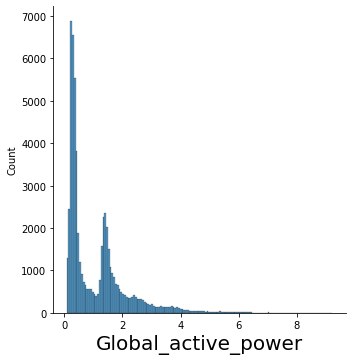

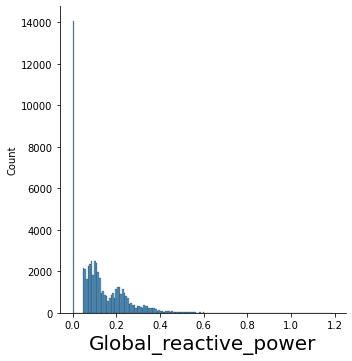

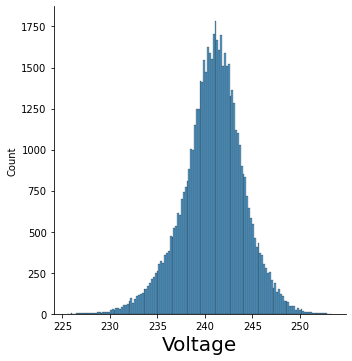

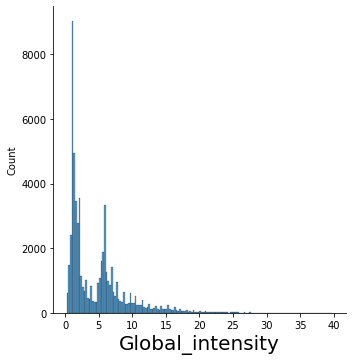

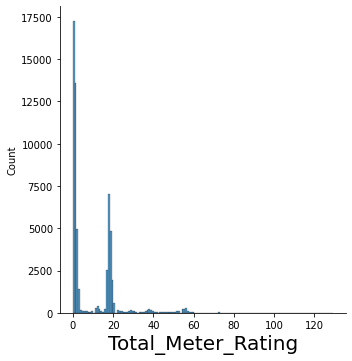

In [134]:
plt.figure(figsize=(15,35),facecolor='red')

for col in data_tf:
    sns.displot(data_tf[col])
    plt.xlabel(col,fontsize=20)
plt.show()   

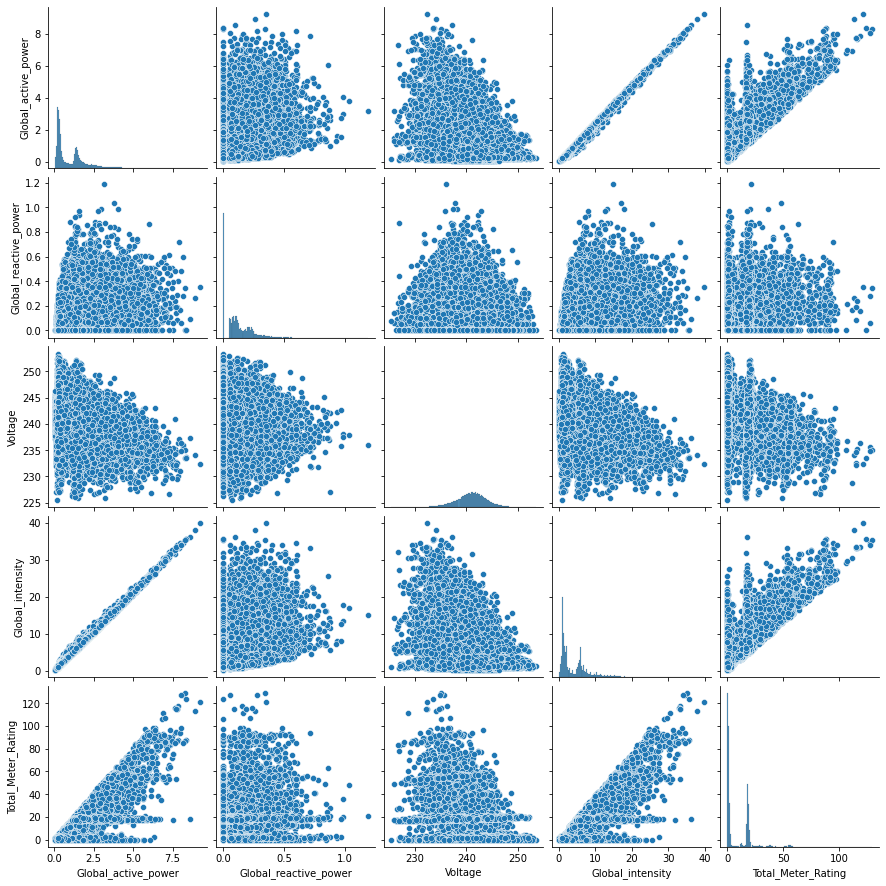

In [63]:
sns.pairplot(data_tf)

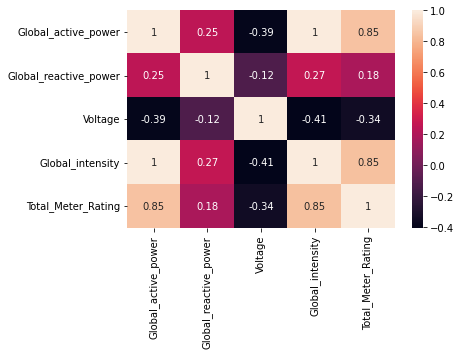

In [64]:
sns.heatmap(data_tf.corr(),annot=True)

In [74]:
#Checking the box plots

In [75]:
data_tf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Total_Meter_Rating'],
      dtype='object')

In [88]:
#Handling Outliers

Text(0.5, 1.0, 'Before Removing Outliers')

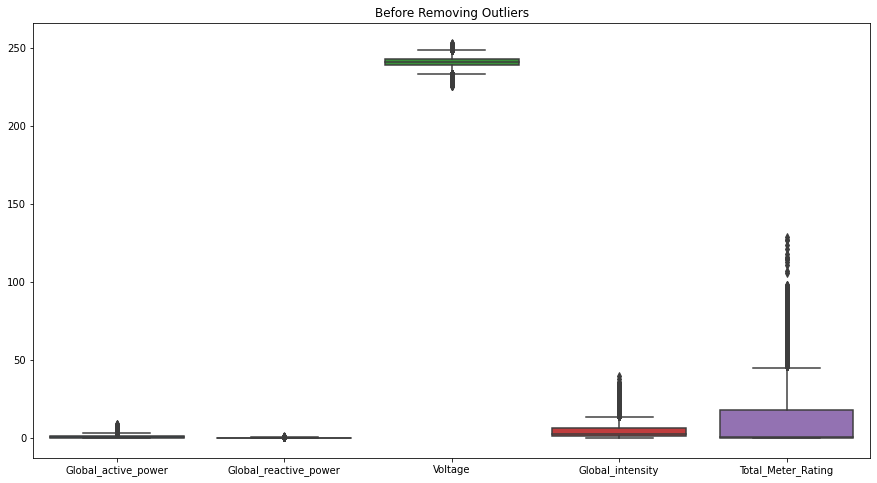

In [91]:
# Checking for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_tf)
plt.title("Before Removing Outliers")

In [142]:
#Creating function to handle outliers 
def outliers_imputation(data_tf,col):
    IQR=data_tf[col].quantile(0.75)-data_tf[col].quantile(0.25)
    lower_fence=data_tf[col].quantile(0.25)-(IQR*1.5)
    upper_fence=data_tf[col].quantile(0.75)+(IQR*1.5)
    data_tf.loc[data_tf[col]<=lower_fence,col]=lower_fence
    data_tf.loc[data_tf[col]>=upper_fence,col]=upper_fence

In [143]:
col=data_tf.columns

In [144]:
for j in col:
    outliers_imputation(data_tf,j)

Text(0.5, 1.0, 'After Removing Outliers')

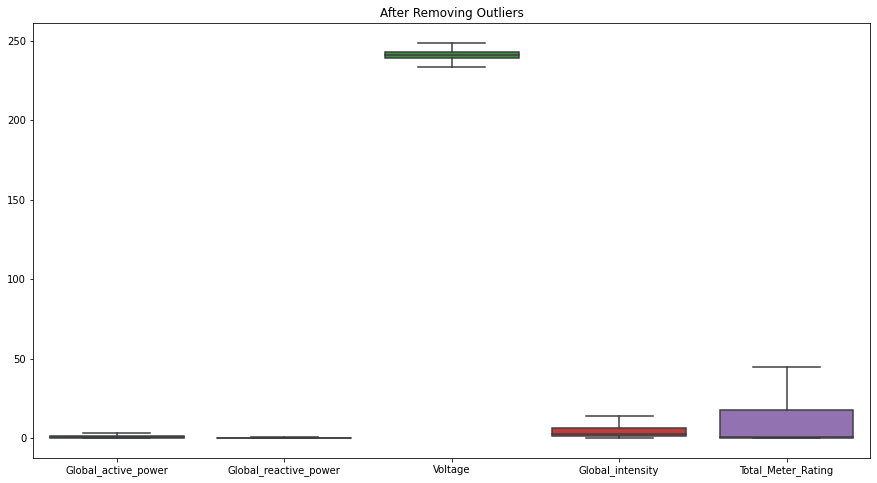

In [147]:
# Box plot for all the features after handling outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_tf)
plt.title("After Removing Outliers")

In [146]:
data_tf.to_csv("SampleCleaned_household_power_consumption.csv",index=False)